# ТЕМА 3. 

Расширенные настройки приложений.

## Лекция. 

Локализация. Дополнительные возможности приложения.

### Учебные вопросы

1. Понятие локализации.
2. Использование QTranslator.
3. Типы окон.
4. Динамическое создание виджетов.
5. Работа с моделями.

## Источники

* Официальная документация: https://doc.qt.io/qtforpython/tutorials

* Прохоренок Н. А., Дронов В. А. Python 3 и PyQt 5. Разработка приложений. 2019 г. 

# 1. Понятие локализации.

**Локализация программного обеспечения** — процесс адаптации
программного обеспечения к культуре какой-либо страны.



В практике написания программного обеспечения (далее - ПО) -
перевод пользовательского интерфейса, документации и
сопутствующих файлов программного обеспечения с одного
языка на другой.


Пример:

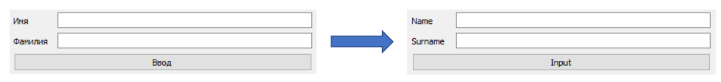

**Этапы локализации**

1. Изучение целевой аудитории

2. Изучение культурных и религиозных особенностей

3. Локализация приложения

**1. Изучение целевой категории**

* Стоимость различных платных функций для разных стран и
регионов может варьироваться;

* В некоторых странах платную
функцию придётся сделать
бесплатной, допустим и обратный
процесс;

* Бывают ситуации, когда цены
могут варьироваться даже
от платформ, на которых
исполняется ваше приложение.

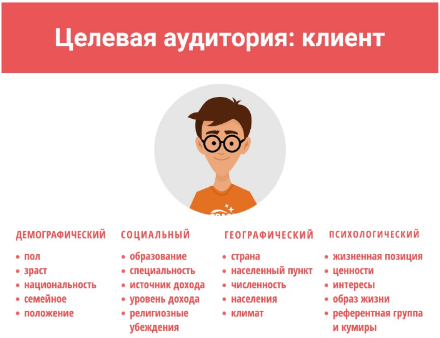

**2. Изучение культурных и религиозных особенностей**

* В Иране очень негативно относятся к собакам, по религиозным
соображениям и их количество в этой стране очень мало;

* В Мексике не принято дарить жёлтые розы, т.к. они символизируют смерть;

* В США, например: «ноль», образованный
большим и указательным пальцем, говорит:
«все нормально», «все о’кей». В Японии этот
же жест означает просто «деньги», во
Франции — ноль. В Португалии и некоторых
других странах он вообще воспринимается
как неприличный.

* Многие индусы — строгие вегетарианцы,
некоторые не едят яйца или рыбу,
предпочитают только фрукты и овощи.
Основные продукты питания индийцев — рис,
зерновые каши, горох, йогурт, молоко, яйца,
овощи и фрукты, разнообразные пряности и
приправы.

**3. Локализация приложения**

Основные шаги при локализации приложения:

1. Обеспечение поддержки языка и
национальных стандартов:

    > Соответствие товарным знакам целевой страны (документация
к ПО, антимонопольное законодательство, законы о хранении
персональных данных);

    > Адаптация приложения под шрифты целевой страны;

    > Соответствие стандартам целевой страны (Формат даты,
времени, дробных и многозначных чисел, система мер и весов,
форматы бумаги)

2. Перевод текстов в интерфейсе
программы на целевой язык.

    > В сложном ПО не все части приложения стоит переводить
(название функций Excel, MySQL, ошибок вашего приложения);

    > Корректная расстановка (подгонка) элементов интерфейса в
соответствии с особенностями языка целевой страны
(существуют языки с написанием справа
налево (арабский, иврит) и сверху вниз (японский));

    > Адаптация изображений, звуков для целевой страны (текст,
возможная замена)

3. Тонкая настройка под целевую
страну.

    > Работа со словоформами («найдено 4 файлов»)

    > Доп. стандарты, не влияющие на функциональность (формат
даты/времени)

    > Взаимодействие с другим ПО (бухгалтерские программы разные
для разных стран)

    > Учёт менталитета (цвета, юмор, пасхалки)

    > Перерисовка графики (дорожные знаки, розетки, флаги)



**Локализация** — это сложная и всеобъемлющая операция.

Уже при разработке ПО соображения будущей интернационализации
должны учитываться самым серьёзным образом. Мы привыкли видеть
программное обеспечение, русифицированное по первому-второму
уровню; сложного ПО с исчерпывающей русификацией практически не
существует.

Примером глубокой локализации может служить операционная система,
где локализация нередко включает и национально-ориентированные
пиктограммы.

# 2. Использование QTranslator

Для перевода строк в приложении PySide2 используется класс
QTranslator.

**Из официальной документации:**

> **QtCore.Qtranslator**

> Объект этого класса содержит набор переводов с исходного языка на целевой язык. 

> QTranslator
предоставляет функции для поиска переводов в файле перевода. Файлы перевода создаются с
помощью Qt Linguist .

> Чаще всего QTranslator используется для загрузки файла перевода и его установки с помощью
`QtCore.QCoreApplication.installTranslator()`

**Инструменты для локализации**

PySide2 обеспечивает отличную поддержку для перевода
приложений на целевые языки.

* «lupdate» - используется для синхронизации исходного кода и
переводов.

* «lrelease» - используется для создания файлов перевода в
приложении.

* «Qt Linguist» - инструмент для переводчиков используется для
перевода слов/фраз в файлах созданных с помощью инструмента
lupdate.

Более подробное описание инструментов в [документации](https://doc.qt.io/qt-5/qtlinguist-index.html).

**Локализация может быть**

Только стандартных элементов

```python
"""
Демонстрация локализации стандартных элементов Qt 
"""

import os.path
from pathlib import Path

from PySide6 import QtCore, QtWidgets


class Window(QtWidgets.QWidget):

    def __init__(self, parent=None) -> None:
        super().__init__(parent)

        self.initTranslation()

        self.initUi()
        self.initSignals()

    def initUi(self) -> None:
        """
        Инициализация Ui

        :return: None
        """

        self.pushButtonQuestion = QtWidgets.QPushButton("Выполнить действие")

        layout = QtWidgets.QVBoxLayout()
        layout.addWidget(self.pushButtonQuestion)

        self.setLayout(layout)

    def initSignals(self) -> None:
        """
        Инициализация сигналов

        :return: None
        """

        self.pushButtonQuestion.clicked.connect(
            lambda: QtWidgets.QMessageBox.question(self, "Вопрос", "Окно на русском")
        )

    def initTranslation(self) -> None:
        """
        Инициализация локализации

        :return: None
        """

        # Получение корневого каталога
        root_dir = Path(__file__).parent.parent.parent.parent
        # Получение каталога, где находятся стандартные переводы
        qt_translation_folder = os.path.join(root_dir, "venv", "Lib", "site-packages", "PySide6", "translations")
        # Инициализируем класс QTranslator
        translator = QtCore.QTranslator(self)
        # Загружаем файл qm для перевода стандартных элементов
        translator.load(os.path.join(qt_translation_folder, "qtbase_ru.qm"))
        # Устанавливаем локализацию окна
        QtWidgets.QApplication.instance().installTranslator(translator)

    def closeEvent(self, event):
        """Функция-обработчик события закрытия окна"""

        reply = QtWidgets.QMessageBox.question(
            self,
            "Выход",
            "Закрыть приложение?",
            QtWidgets.QMessageBox.Yes | QtWidgets.QMessageBox.No | QtWidgets.QMessageBox.Cancel,
            QtWidgets.QMessageBox.No
        )

        if reply == QtWidgets.QMessageBox.Yes:
            event.accept()
        else:
            event.ignore()


if __name__ == "__main__":
    app = QtWidgets.QApplication()

    myapp = Window()
    myapp.show()

    app.exec()
```

Пользовательских элементов

---

Этапы создания файла переводов для Qt:

1. Создаем в классе метод `retranslateUi` *(может быть другое название)*

    Примерное содержание метода
```python
    def retranslateUi(self) -> None:
        """
        Метод для установки перевода
        
        :return: None
        """

        # Указываем что текст в элементах подлежит переводу
        self.labelName.setText(QtWidgets.QApplication.translate("MyTranslateApp", "Имя"))
        self.labelSurname.setText(QtWidgets.QApplication.translate("MyTranslateApp", "Фамилия"))
        self.button_input.setText(QtWidgets.QApplication.translate("MyTranslateApp", "Ввод"))
        self.setWindowTitle(QtWidgets.QApplication.translate("MyTranslateApp", "Переводчик"))
```

2. Используя программу lupdate создаём файл с расширением `.ts`, в котором будт содержаться данные для подготовки файла с переводами элементов:

    ```commandline
pyside6-lupdate your_py_file.py -ts your_translate_name.ts
```

3. Вручную или с помощью программы Qt Linguist правим `.ts` файл и сохраняем его.

    ```commandline
    pyside6-linguist  # запуск Qt Linguist
    ```

4. С помощью программы Qt Linguist создаём файл с переводами в формате `.qm`

    ```commandline
    pyside6-lrelease your_translate_name.ts your_translate_name.qm  # создание файла .qm вручную
    ```

5. Подключаем файл `.qm` в программе

```python
"""
Демонстрация перевода пользовательского текста в приложении
"""

import os
from pathlib import Path

from PySide6 import QtCore, QtWidgets, QtGui


class Window(QtWidgets.QWidget):

    def __init__(self, parent=None) -> None:
        super().__init__(parent)

        self.initUi()
        self.initTranslators()
        self.initSignals()

    def initUi(self) -> None:
        """
        Инициализация Ui

        :return: None
        """

        self.setWindowTitle("Переводчик")
        self.setFixedSize(400, 300)

        self.button_ru = QtWidgets.QPushButton("RU")
        self.button_en = QtWidgets.QPushButton("EN")
        self.button_input = QtWidgets.QPushButton("Ввод")

        self.line_edit_name = QtWidgets.QLineEdit()
        self.line_edit_surname = QtWidgets.QLineEdit()

        self.labelName = QtWidgets.QLabel("Имя")
        self.labelName.setMinimumWidth(60)
        self.labelSurname = QtWidgets.QLabel("Фамилия")
        self.labelSurname.setMinimumWidth(60)

        layout_v = QtWidgets.QVBoxLayout()
        layout_h1 = QtWidgets.QHBoxLayout()
        layout_h2 = QtWidgets.QHBoxLayout()
        layout_h3 = QtWidgets.QHBoxLayout()
        layout_h4 = QtWidgets.QHBoxLayout()

        layout_h1.addWidget(self.labelName)
        layout_h1.addWidget(self.line_edit_name)

        layout_h2.addWidget(self.labelSurname)
        layout_h2.addWidget(self.line_edit_surname)

        layout_h3.addWidget(self.button_input)

        layout_h4.addWidget(self.button_ru)
        layout_h4.addWidget(self.button_en)

        layout_v.addLayout(layout_h1)
        layout_v.addLayout(layout_h2)
        layout_v.addLayout(layout_h3)
        layout_v.addLayout(layout_h4)
        layout_v.addItem(QtWidgets.QSpacerItem(
            1, 1, QtWidgets.QSizePolicy.Minimum, QtWidgets.QSizePolicy.Expanding)
        )
        self.setLayout(layout_v)

    def initSignals(self) -> None:
        """
        Инициализация сигналов

        :return: None
        """

        self.button_ru.clicked.connect(self.setLocalization)
        self.button_en.clicked.connect(self.setLocalization)

    def initTranslators(self) -> None:
        """
        Инициализация переводчиков

        :return: None
        """

        self.translator = QtCore.QTranslator(self)
        self.translatorApp = QtCore.QTranslator(self)

        self.setLocalization()

    def changeEvent(self, event: QtCore.QEvent) -> None:
        """
        Отслеживание изменения состояния окна

        :param event: QtCore.QEvent
        :return: None
        """

        if event.type() == QtCore.QEvent.LanguageChange:
            self.retranslateUi()
        super().changeEvent(event)

    def setLocalization(self) -> None:
        """
        Установка локализации

        :return: None
        """

        sender = self.sender()
        if sender is None:
            lang = "ru"
        else:
            lang = sender.text().lower()

        root_dir = Path(__file__).parent.parent.parent.parent
        qt_translation_folder = os.path.join(root_dir, "venv", "Lib", "site-packages", "PySide6", "translations")

        if lang == "ru":
            QtCore.QCoreApplication.removeTranslator(self.translator)

            self.translatorApp.load(os.path.join(qt_translation_folder, f"qtbase_ru.qm"))

        elif lang == "en":
            self.translator.load(os.path.join(os.getcwd(), "translations", f"to_en.qm"))
            QtCore.QCoreApplication.installTranslator(self.translator)

            self.translatorApp.load(os.path.join(qt_translation_folder, f"qtbase_en.qm"))

        QtCore.QCoreApplication.installTranslator(self.translatorApp)

    def retranslateUi(self) -> None:
        """
        Обновление фраз для перевода

        :return: None
        """

        self.setWindowTitle(QtCore.QCoreApplication.translate("MyTranslateApp", "Переводчик"))
        self.labelName.setText(QtCore.QCoreApplication.translate("MyTranslateApp", "Имя"))
        self.labelSurname.setText(QtCore.QCoreApplication.translate("MyTranslateApp", "Фамилия"))
        self.button_input.setText(QtCore.QCoreApplication.translate("MyTranslateApp", "Ввод"))

        self.exit_question_title = QtCore.QCoreApplication.translate("MyTranslateApp", "Выход")
        self.exit_question_body = QtCore.QCoreApplication.translate(
            "MyTranslateApp", "Вы действительно хотите закрыть программу?"
        )

    def closeEvent(self, event: QtGui.QCloseEvent) -> None:
        """
        Действия при закрытии окна

        :param event: QtGui.QCloseEvent
        :return: None
        """

        reply = QtWidgets.QMessageBox.question(
            self,
            self.exit_question_title,
            self.exit_question_body,
            QtWidgets.QMessageBox.Yes | QtWidgets.QMessageBox.No,
            QtWidgets.QMessageBox.No
        )

        if reply == QtWidgets.QMessageBox.Yes:
            event.accept()
        else:
            event.ignore()


if __name__ == "__main__":
    app = QtWidgets.QApplication()

    myapp = Window()
    myapp.show()

    app.exec()
```

# 3. Типы окон

Для  указания различных свойств окна  для виджета используется набор свойств из класса **PySide6.QtCore.Qt.WindowType**

Используются они довольно редко, но в некоторых случаях необходимы. Некоторые из этих флагов зависят от того, поддерживает ли их базовый оконный менеджер.

```python
"""
Демонстрация применения флагов Qt.WindowType
"""

from PySide6 import QtCore, QtWidgets


class Window(QtWidgets.QWidget):

    def __init__(self, parent=None):
        super().__init__(parent)

        # Неизменяемое окно
        # self.setWindowFlags(QtCore.Qt.MSWindowsFixedSizeDialogHint)

        # Неизменяемое окно без рамок
        # self.setWindowFlags(QtCore.Qt.MSWindowsFixedSizeDialogHint | QtCore.Qt.FramelessWindowHint)

        # Окно со строкой заголовка
        self.setWindowFlags(QtCore.Qt.WindowTitleHint)


if __name__ == "__main__":
    app = QtWidgets.QApplication()

    myWindow = Window()
    myWindow.show()

    app.exec()
```

## Типы окон

**Qt.Widget**

Это тип по умолчанию для QWidget. Виджеты этого типа являются дочерними виджетами, если у них есть родительский элемент, и независимыми окнами, если у них нет родительского элемента.



**Qt.Window**

Указывает, что виджет представляет собой окно, обычно с рамкой оконной системы и строкой заголовка, независимо от того, имеет ли виджет родительский элемент или нет. Обратите внимание, что снять этот флаг невозможно, если у виджета нет родительского элемента.



**Qt.Dialog**

Указывает, что виджет представляет собой окно, которое должно быть оформлено как диалоговое окно (т. е. обычно в строке заголовка нет кнопок "Развернуть" или "Свернуть"). 

Это тип по умолчанию для QDialog. Если вы хотите использовать его как модальный диалог, он должен быть запущен из другого окна или иметь родительский элемент и использоваться со свойством `windowModality`. 

Если вы сделаете его модальным, диалоговое окно **не позволит** другим окнам верхнего уровня в приложении получать какие-либо входные данные. Мы ссылаемся на окно верхнего уровня, у которого есть родительский элемент, в качестве дополнительного окна.



**Qt.Sheet**

Указывает, что окно представляет собой лист в macOS.



**Qt.Popup**

Указывает, что виджет является всплывающим окном верхнего уровня, т. e. что он модальный, но имеет системный фрейм окна, подходящий для всплывающих меню.



**Qt.Tool**

Указывает, что виджет является окном инструментов. Окно инструмента часто представляет собой небольшое окно с заголовком и оформлением меньшего размера. 

Если есть родительский элемент, окно Tool всегда будет находиться поверх него. 

Если оконная система поддерживает это, окно Tool может быть оформлено несколько более светлой рамкой. Его также можно комбинировать с `Qt::FramelessWindowHint`. В macOS окна инструментов соответствуют классу Windows NSPanel. Это означает, что окно находится на уровне выше обычных окон, что делает невозможным размещение обычного окна поверх него. По умолчанию окна инструментов исчезают, когда приложение неактивно. Этим можно управлять с помощью `WA_MacAlwaysShowToolWindow` атрибута.



**Qt.ToolTip**

Указывает, что виджет является всплывающей подсказкой. Это используется внутри приложения для реализации всплывающих подсказок.



**Qt.SplashScreen**

Указывает, что окно является заставкой. Это тип по умолчанию для QSplashScreen.



**Qt.SubWindow**

Указывает, что этот виджет является дочерним окном, например `QMdiSubWindow` виджетом.



## Дополнительные свойства

Существует также ряд флагов, которые вы можете использовать для настройки внешнего вида окон верхнего уровня. Это не влияет на другие окна:




**Qt.MSWindowsFixedSizeDialogHint**

Придает окну тонкую границу диалогового окна в Windows. Этот стиль традиционно используется для диалоговых окон фиксированного размера.

> **Примечание**

> Использование этого флага не рекомендуется в средах с несколькими мониторами. Это связано с тем, что система будет следить за тем, чтобы окно сохраняло свой собственный размер при перемещении его по экранам. Это особенно нежелательно при использовании мониторов с разным разрешением.




**Qt.BypassWindowManagerHint**

Этот флаг может использоваться для указания плагину платформы, что “все” протоколы диспетчера окон должны быть отключены. 

Этот флаг будет вести себя по-разному в зависимости от того, в какой операционной системе запущено приложение и какой оконный менеджер запущен. 

Флаг можно использовать для получения собственного окна без набора конфигурации.



**Qt.X11BypassWindowManagerHint**

Полностью обходите оконный менеджер. В результате получается окно без полей, которое вообще не управляется (т. е. Нет ввода с клавиатуры, если вы не вызываете `activateWindow()`вручную).



**Qt.FramelessWindowHint**

Создает окно без полей.




**Qt.NoDropShadowWindowHint**

Отключает тень от окна на поддерживающих платформах.



**CustomizeWindowHint** Флаг используется для включения настройки элементов управления window. 

Этот флаг должен быть установлен, чтобы разрешить WindowTitleHint изменение флагов WindowSystemMenuHint, WindowMinimizeButtonHint, WindowMaximizeButtonHintи WindowCloseButtonHint.




**Qt.CustomizeWindowHint**

Отключает подсказки заголовка окна по умолчанию.



**Qt.WindowTitleHint**

Придает заголовку окна подсказку.



**Qt.WindowSystemMenuHint**

Добавляет окно системного меню и, возможно, кнопку закрытия (например, на Mac). Если вам нужно скрыть или показать кнопку закрытия, удобнее использовать **WindowCloseButtonHint**.



**Qt.WindowMinimizeButtonHint**

Добавляет кнопку сворачивания. На некоторых платформах это подразумевает Qt::WindowSystemMenuHint для его работы.



**Qt.WindowMaximizeButtonHint**

Добавляет кнопку развернуть. На некоторых платформах это подразумевает Qt::WindowSystemMenuHint для его работы.



**Qt.WindowMinMaxButtonsHint**

Добавляет кнопки сворачивания и разворачивания. На некоторых платформах это подразумевает Qt::WindowSystemMenuHint для его работы.



**Qt.WindowCloseButtonHint**

Добавляет кнопку закрытия. На некоторых платформах это подразумевает Qt::WindowSystemMenuHint для его работы.



**Qt.WindowContextHelpButtonHint**

Добавляет кнопку контекстной справки в диалоговые окна. На некоторых платформах это подразумевает Qt::WindowSystemMenuHint для его работы.



**Qt.MacWindowToolBarButtonHint**

В macOS добавлена кнопка панели инструментов (т. е. продолговатая кнопка, которая находится в правом верхнем углу окон с панелями инструментов).



**Qt.WindowShadeButtonHint**

Добавляет кнопку затенения вместо кнопки сворачивания, если ее поддерживает базовый оконный менеджер.



**Qt.WindowStaysOnTopHint**

Информирует оконную систему о том, что окно должно оставаться поверх всех других окон. Обратите внимание, что в некоторых оконных менеджерах на X11 вам также необходимо передать `Qt::X11BypassWindowManagerHint`, чтобы этот флаг работал правильно.



# 4. Динамическое создание виджетов.

При создании приложений на Qt довольно часто возникает необходимость создать дополнительный виджет, который не предусмотрен Ui-формой или компоновкой приложения.



Это делается достаточно просто, необходимо лишь понимать: 

* каким образом взаимодействуют между собой основной виджет, слои (layout-ы), и виджеты, которые размещаются в этих самых слоях. 

* особенности уничтожения "подчиненных" объектов при срабатывании деструктора виджета.




```python
"""
Демонстрация динамического создания виджетов
"""

from PySide6 import QtWidgets
from random_word import RandomWords


class Window(QtWidgets.QWidget):

    def __init__(self, parent=None):
        super().__init__(parent)

        self.randomWords = RandomWords()

        self.initUi()
        self.initSignals()

    def initUi(self) -> None:
        """
        Инициализация Ui

        :return: None
        """

        self.pushButtonAddLineEdit = QtWidgets.QPushButton("Добавить lineEdit")
        self.pushButtonAddComboBox = QtWidgets.QPushButton("Добавить comboBox")

        self.layout_dynamic = QtWidgets.QVBoxLayout()

        for i in range(5):
            self.layout_dynamic.addWidget(self.createLineEdit())

        layout = QtWidgets.QVBoxLayout()
        layout.addLayout(self.layout_dynamic)
        layout.addSpacerItem(QtWidgets.QSpacerItem(
            10, 20, QtWidgets.QSizePolicy.Policy.Expanding, QtWidgets.QSizePolicy.Policy.Expanding)
        )
        layout.addWidget(self.pushButtonAddLineEdit)
        layout.addWidget(self.pushButtonAddComboBox)

        self.setLayout(layout)

    def initSignals(self) -> None:
        """
        Инициализация сигналов

        :return: None
        """

        self.pushButtonAddLineEdit.clicked.connect(
            lambda: self.layout_dynamic.addWidget(self.createLineEdit())
        )

        self.pushButtonAddComboBox.clicked.connect(
            lambda: self.layout_dynamic.addWidget(self.createComboBox())
        )

    def createLineEdit(self) -> QtWidgets.QLineEdit:
        """
        Создание QLineEdit

        :return: QtWidgets.QLineEdit
        """

        lineEdit = QtWidgets.QLineEdit()
        lineEdit.setObjectName(f"lineEdit_{self.layout_dynamic.count()}")
        lineEdit.textChanged.connect(lambda: print(lineEdit.objectName(), lineEdit.text()))
        lineEdit.setPlaceholderText(lineEdit.objectName())

        return lineEdit

    def createComboBox(self) -> QtWidgets.QComboBox:
        """
        Создание ComboBox

        :return: QtWidgets.QComboBox
        """

        comboBox = QtWidgets.QComboBox()
        comboBox.setObjectName(f"comboBox_{self.layout_dynamic.count()}")
        comboBox.addItems(self.randomWords.get_random_words())
        comboBox.currentIndexChanged.connect(lambda: print(comboBox.objectName(), comboBox.currentText()))

        return comboBox


if __name__ == "__main__":
    app = QtWidgets.QApplication()

    window = Window()
    window.show()

    app.exec()

```

# 5. Работа с моделями

!!!!ДОБАВИТЬ КОД!!!!

[Полная статья](https://doc.qt.io/qt-6/model-view-programming.html#view-classes)

Qt содержит набор виджетов, которые используют архитектуру модель/представление для управления взаимосвязью между данными и  пользователем. 

Разделение функциональных возможностей, введенное этой архитектурой, дает разработчикам большую гибкость в настройке представления элементов и предоставляет стандартный интерфейс модели, позволяющий использовать широкий спектр источников данных с существующими представлениями элементов. 

## **Модели**

Все модели элементов основаны на классе `QAbstractItemModel`. Этот класс определяет интерфейс, который используется представлениями и делегатами для доступа к данным. Сами данные не обязательно должны храниться в модели; они могут храниться в структуре данных или хранилище, предоставляемом отдельным классом, файлом, базой данных или каким-либо другим компонентом приложения.



**QAbstractItemModel** предоставляет интерфейс к данным, который является достаточно гибким для обработки представлений, представляющих данные в виде таблиц, списков и деревьев. Однако при реализации новых моделей для списков и табличных структур данных классы `QAbstractListModel` и `QAbstractTableModel` являются лучшими отправными точками, поскольку они обеспечивают соответствующие реализации общих функций по умолчанию. Каждый из этих классов может быть подклассом для предоставления моделей, поддерживающих специализированные типы списков и таблиц.



Qt предоставляет несколько готовых моделей, которые можно использовать для обработки элементов данных:

**QStringListModel** используется для хранения простого списка элементов QString.


**QStandardItemModel** управляет более сложными древовидными структурами элементов, каждый из которых может содержать произвольные данные.


**QFileSystemModel** предоставляет информацию о файлах и каталогах в локальной файловой системе.

**QSqlQueryModel**, **QSqlTableModel** и **QSqlRelationalTableModel** используются для доступа к базам данных с использованием соглашений о модели/представлении.

Если эти стандартные модели не соответствуют вашим требованиям, вы можете создать подклассы `QAbstractItemModel`, `QAbstractListModel` или `QAbstractTableModel` для создания собственных пользовательских моделей.


```python
"""
Создание модели для treeView
"""

def initTreeModel(self) -> None:
    """
    Инициализация древовидной модели

    :return: None
    """

    self.treeModel = QtGui.QStandardItemModel()
    self.treeModel.setHorizontalHeaderLabels(['Проект', 'Информация'])

    # Добавление root элемента
    itemProject = QtGui.QStandardItem('Проект')
    self.treeModel.appendRow(itemProject)
    self.treeModel.setItem(0, 1, QtGui.QStandardItem('Описание проекта'))

    # Добавление subroot элемента
    itemChild = QtGui.QStandardItem('Папка 1')
    itemProject.appendRow(itemChild)
    itemProject.setChild(0, 1, QtGui.QStandardItem('Описание'))

    # Продолжаем добавлять элементы
    itemFolder = QtGui.QStandardItem('Папка 2')
    itemProject.appendRow(itemFolder)

    for group in range(5):
        itemGroup = QtGui.QStandardItem(f'Группа_{group + 1}')
        itemFolder.appendRow(itemGroup)

    for ch in range(group + 1):
        itemCh = QtGui.QStandardItem(f'Элемент_{ch + 1}')
        itemCh.setCheckable(True)

        itemGroup.appendRow(itemCh)
        itemGroup.setChild(itemCh.index().row(), 1, QtGui.QStandardItem(f'Элемент_{ch + 1} описание'))

        itemProject.setChild(itemFolder.index().row(), 1, QtGui.QStandardItem('Папка 2 описание'))


```

```python
"""
Создание строковой модели данных
"""

def initListModel(self) -> None:
    """
    Инициализация строковой модели данных

    :return: None
    """

    random_word = RandomWords().get_random_words()

    self.listModel = QtCore.QStringListModel(random_word)

```

```python
"""
Создание модели для tableView
"""


def initTableModel(self) -> None:
    """
    Инициализация табличной модели

    :return: None
    """

    self.tableModel = QtGui.QStandardItemModel()

    random_words = RandomWords().get_random_words()

    for row, elem in enumerate(random_words):
        item1 = QtGui.QStandardItem(str(row + 10))
        item2 = QtGui.QStandardItem(random_words[row])
        item3 = QtGui.QStandardItem(str(random.randint(0, 220)))
        self.tableModel.appendRow([item1, item2, item3])

    self.tableModel.setHorizontalHeaderLabels(["№ п/п", "Слово", "Значение"])
    self.tableModel.dataChanged.connect(self.tableViewDataChanged)
```

## **Делегаты**

**QAbstractItemDelegate** - это абстрактный базовый класс для делегатов в среде модель/представление. Реализация делегата по умолчанию предоставляется `QStyledItemDelegate`, и он используется в качестве делегата по умолчанию в стандартных представлениях Qt. 

Рекомендуется использовать `QStyledItemDelegate` в качестве базового класса при реализации пользовательских делегатов или при работе с таблицами стилей Qt.

```python
"""
Примерный код создания делегатов
"""


class DoubleSpinBoxDelegate(QtWidgets.QStyledItemDelegate):
    """
    Класс для создания DoubleSpinbox делегата
    """

    def createEditor(self, parent: QtWidgets.QWidget, option: QtWidgets.QStyleOptionViewItem,
                     index: Union[QtCore.QModelIndex, QtCore.QPersistentModelIndex]) -> QtWidgets.QWidget:
        """
        Создание элемента для редактирования данных

        :param parent: родитель
        :param option: настройки
        :param index: индекс где будет находиться
        :return: doubleSpinBox
        """

        # создание и настройка делегата
        editor = QtWidgets.QDoubleSpinBox(parent, decimals=2)
        editor.setFrame(False)
        editor.setMinimum(-40)
        editor.setMaximum(40)

        editor.valueChanged.connect(lambda: print(editor.value()))

        return editor

    def updateEditorGeometry(self, editor: QtWidgets.QWidget, option: QtWidgets.QStyleOptionViewItem,
                             index: Union[QtCore.QModelIndex, QtCore.QPersistentModelIndex]) -> None:
        """
        Обновление размера

        :param editor: виджет который настраиваем
        :param option: опции отображения
        :param index: индекс выбранного виджета
        :return: None
        """

        # установка размеров по размеру родителя
        editor.setGeometry(option.rect)


class ComboBoxDelegate(QtWidgets.QStyledItemDelegate):

    def __init__(self, parent=None):
        super().__init__(parent)
        self.items = []

    def setItems(self, items: list) -> None:
        """
        Установка данных в делегат

        :param items: список элементов
        :return: None
        """

        self.items = items

    def createEditor(self, parent: QtWidgets.QWidget, option: QtWidgets.QStyleOptionViewItem,
                     index: Union[QtCore.QModelIndex, QtCore.QPersistentModelIndex]) -> QtWidgets.QWidget:
        """
        Создание элемента для редактирования данных

        :param parent: родитель
        :param option: настройки
        :param index: индекс где будет находиться
        :return: doubleSpinBox
        """

        editor = QtWidgets.QComboBox(parent)
        editor.addItems(self.items)
        editor.currentIndexChanged.connect(lambda: print(editor.currentText()))

        return editor

    def setModelData(self, editor: QtWidgets.QWidget, model: QtCore.QAbstractItemModel,
                     index: Union[QtCore.QModelIndex, QtCore.QPersistentModelIndex]) -> None:
        """
        Установка данных из делегата в модель

        :param editor: выбранный элемент в представлении
        :param model: модель представления
        :param index: индекс выбранного элемента
        :return: None
        """

        model.setData(index, editor.currentText(), QtCore.Qt.EditRole)

    def updateEditorGeometry(self, editor: QtWidgets.QWidget, option: QtWidgets.QStyleOptionViewItem,
                             index: Union[QtCore.QModelIndex, QtCore.QPersistentModelIndex]) -> None:
        """
        Обновление размера

        :param editor: виджет который настраиваем
        :param option: опции отображения
        :param index: индекс выбранного виджета
        :return: None
        """

        editor.setGeometry(option.rect)



```

## **Представления**
В архитектуре модели/представления представление получает элементы данных из модели и представляет их пользователю. Способ представления данных не обязательно должен напоминать представление данных, предоставляемых моделью, и может быть совершенно разным из базовой структуры данных, используемой для хранения элементов данных.





Представления обычно управляют общим расположением данных, полученных из моделей. Они могут сами отображать отдельные элементы данных или использовать делегаты для обработки функций рендеринга и редактирования.



Помимо представления данных, представления обрабатывают навигацию между элементами и некоторые аспекты выбора элементов. Представления также реализуют основные функции пользовательского интерфейса, такие как контекстные меню и перетаскивание. Представление может предоставлять возможности редактирования элементов по умолчанию или может работать с делегировать чтобы предоставить пользовательский редактор.



Представление может быть создано без модели, но модель должна быть предоставлена, прежде чем она сможет отображать полезную информацию. Представления отслеживают элементы, выбранные пользователем с помощью модели выделения, которая может поддерживаться отдельно для каждого представления или использоваться совместно несколькими представлениями.



Некоторые представления, такие как QTableView и QTreeView, отображают **заголовки**, а также элементы. Они  реализуются с помощью класса **QHeaderView**. 

Заголовки обычно обращаются к той же модели, что и представление, которое их содержит. Они извлекают данные из модели с помощью `QAbstractItemModel::headerData()`.

Использование существующего представления
Qt предоставляет три готовых к использованию класса представлений, которые представляют данные из моделей способами, знакомыми большинству пользователей. 

**QListView** - Просмотр списка может отображать элементы из модели в виде простого списка или в виде классического представления значков. 

**QTreeView** отображает элементы модели в виде иерархии списков, позволяя компактно представлять глубоко вложенные структуры. 

**QTableView** представляет элементы модели в виде таблицы, очень похожей на макет приложения для работы с электронными таблицами.